In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [4]:
df = pd.read_csv("iris.csv")
df.head()
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [21]:
encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Standardize numerical features
scaler = StandardScaler()
features = df.drop("species", axis=1)
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['species'] = df['species']
df_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa


In [8]:
x = df_scaled.drop("species", axis = 1)
y = df_scaled["species"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42) 

print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)

Training set size: (120, 4)
Testing set size: (30, 4)


In [ ]:
df_scaled.to_csv("iris_preprocessed.csv", index=False)

In [10]:
df_view = pd.read_csv("iris_preprocessed.csv")
print(df_view.head())

   sepal_length  sepal_width  petal_length  petal_width species
0     -0.900681     1.032057     -1.341272    -1.312977  setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  setosa
2     -1.385353     0.337848     -1.398138    -1.312977  setosa
3     -1.506521     0.106445     -1.284407    -1.312977  setosa
4     -1.021849     1.263460     -1.341272    -1.312977  setosa


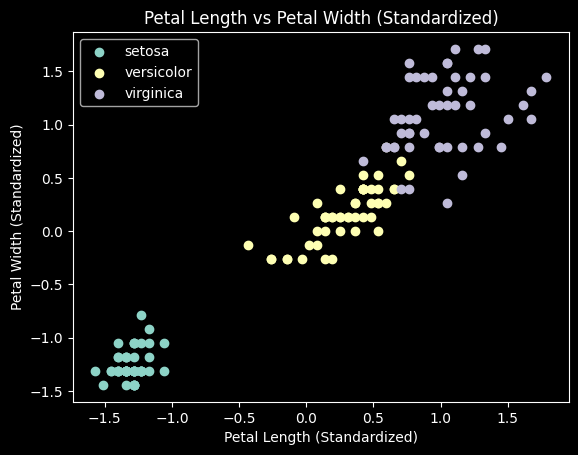

In [14]:
plt.figure()
for species in df_scaled['species'].unique():
    subset = df_scaled[df_scaled['species'] == species]
    plt.scatter(subset['petal_length'], subset['petal_width'], label=species)

plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.title('Petal Length vs Petal Width (Standardized)')
plt.legend()
plt.show()